# Analysis

**Problem Statement:**

There are so many apps on app store, some paid some free; I want to validate few of these scenarios:
 - What makes an app successfull, what is that metric
 - What other metrics are available?
 - Is there correlation between this success metric and other metrics
 - What does the clusters look like if we try to cluster them
 
This might sound vague at the moment but essentially I want to analyse apps in app store;

### Task 1: In this notebook we would essentially be dealing with pre processing of the data to make it more convenient to use;

In [1]:
import json
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

sns.set_style("whitegrid")
sns.set_palette("Set1", 8, .75)

In [2]:
df = pd.read_csv("../dataset/data.csv")

In [3]:
# list of all columns
df.columns

Index(['kind', 'features', 'advisories', 'trackCensoredName', 'fileSizeBytes',
       'contentAdvisoryRating', 'genreIds', 'currentVersionReleaseDate',
       'currency', 'wrapperType', 'version', 'artistName', 'artistId',
       'genres', 'price', 'description', 'trackName', 'bundleId',
       'isVppDeviceBasedLicensingEnabled', 'primaryGenreName', 'releaseDate',
       'minimumOsVersion', 'formattedPrice', 'primaryGenreId',
       'averageUserRating', 'userRatingCount', 'avgUserRatingCV',
       'userRatingCountCV', 'sellerUrl', 'releaseNotes'],
      dtype='object')

In [4]:
print ("No of rows in dataset: %d, No of columns: %d" %  (df.shape[0], df.shape[1]))

No of rows in dataset: 232724, No of columns: 30


**Note that:** `trackName` property is the name of application and `bundleId` is the unique name; we can use these bost as unique properties;


In [5]:
# let's define a new dataframe where we will store more processed information
data = pd.DataFrame()
data['bundleId'] = df['bundleId']
data['trackName'] = df['trackName']

## Pre processing

### (1) Kind

In [6]:
df.kind.value_counts()

software    232724
Name: kind, dtype: int64

**Summary**: all data in the list is of same kind hence we will ignore this property
### (2) features

In [7]:
df.features.value_counts(normalize=True) * 100

["iosUniversal"]    68.989876
[]                  31.010124
Name: features, dtype: float64

**Summary:** since there are only two possible outcomes I'll conver this to a column called `isUniversal`

In [8]:
def getIsUniversal(x):
    if x == '[]':
        return False
    return True

data['IsUniversal'] = df['features'].apply(lambda x: getIsUniversal(x))

data.head(10)

,bundleId,trackName,IsUniversal
0,com.aaa.iphone.discounts,AAA Mobile,True
1,com.nextgenreality.gunclublite,AAA GUN CLUB lite,False
2,com.mcgames.chaosstrike2,Vanguard Online - AAA Shooting Free Online Gam...,True
3,com.BulletParty.BunboGames,AAA Bullet Party - Online first person shooter...,True
4,com.fmapp2010.ISearchFree,iSheacher,False
5,com.onteca.civilwarlite,AAA American Civil War Cannon Shooter : Defend...,True
6,com.appynation.powertoolsfree,Draw with Powertools FX Free,True
7,com.1361447304.4691361447304,AAA+ Foundr - Entrepreneur Magazine for a Startup,True
8,com.1443792976.11461443792976,AAA+ Swimsuits & Sports Magazine App For Men,True
9,com.AnjaneyaApps.AAA1024Free,AAA 1024 Puzzle - cool math board game,True


### (3) advisories

In [9]:
# df.advisories.value_counts()
# TODO: this is a categorical data and one row can have one or more of these; Think of how to deal with this
# but this could be an important data after all

### (4) trackCensoredName

This seem to be very similar to the name of the track itself, let's see the no of rows where these values differ

In [10]:
print (df.loc[df['trackCensoredName'] != df['trackName']].shape)

df.loc[df['trackCensoredName'] != df['trackName']][['trackCensoredName', 'trackName']]

(3, 30)


,trackCensoredName,trackName
77518,F*g Garanti - Kvalitetsstemplet,Fag Garanti - Kvalitetsstemplet
138646,F*G SmartCheck,FAG SmartCheck
177041,Chin'Chic et les P't**s Malins,Chin'Chic et les P'tits Malins


**Summary:**: only three rows with trackCensoredName differing from trackName so this features is useless for now

### (5) fileSizeBytes
This seem to be an interesting property let's see

Average file size in MD: 58.24 
Median file size in MD: 30.05 


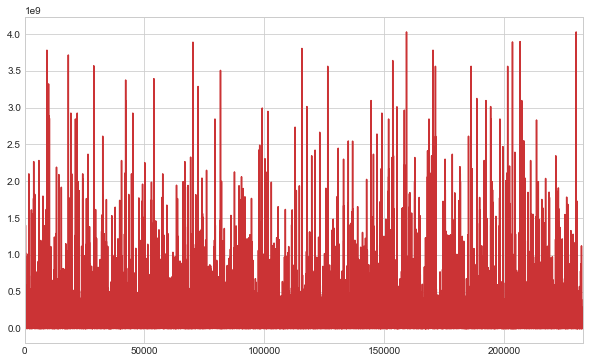

In [11]:
meanSize = df.fileSizeBytes.mean()
medianSize = df.fileSizeBytes.median()


print ("Average file size in MD: %0.2f " % (meanSize / (1024 * 1024)))
print ("Median file size in MD: %0.2f " % (medianSize / (1024 * 1024)))

df.fileSizeBytes.plot(figsize=(10,6))

In [12]:
data['fileSizeInMB'] = df['fileSizeBytes'].apply(lambda x: x / (1024 * 1024))
data.head(10)

,bundleId,trackName,IsUniversal,fileSizeInMB
0,com.aaa.iphone.discounts,AAA Mobile,True,153.721680
1,com.nextgenreality.gunclublite,AAA GUN CLUB lite,False,29.033732
2,com.mcgames.chaosstrike2,Vanguard Online - AAA Shooting Free Online Gam...,True,174.367188
3,com.BulletParty.BunboGames,AAA Bullet Party - Online first person shooter...,True,1182.394531
4,com.fmapp2010.ISearchFree,iSheacher,False,1.434688
5,com.onteca.civilwarlite,AAA American Civil War Cannon Shooter : Defend...,True,107.042969
6,com.appynation.powertoolsfree,Draw with Powertools FX Free,True,56.867188
7,com.1361447304.4691361447304,AAA+ Foundr - Entrepreneur Magazine for a Startup,True,32.477539
8,com.1443792976.11461443792976,AAA+ Swimsuits & Sports Magazine App For Men,True,37.444336
9,com.AnjaneyaApps.AAA1024Free,AAA 1024 Puzzle - cool math board game,True,13.113281


### (6) contentAdvisoryRating

4+               176858
17+               24352
12+               22451
9+                 9055
Not yet rated         8
Name: contentAdvisoryRating, dtype: int64

Normalized distribution %
4+               75.994741
17+              10.463897
12+               9.647050
9+                3.890875
Not yet rated     0.003438
Name: contentAdvisoryRating, dtype: float64


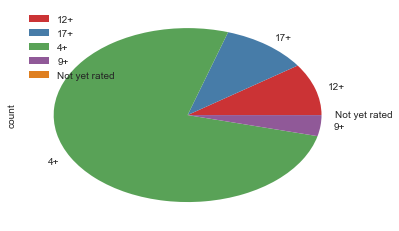

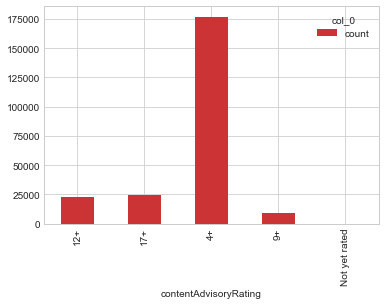

In [13]:
print (df.contentAdvisoryRating.value_counts())
print ()
print ("Normalized distribution %")
print (df.contentAdvisoryRating.value_counts(normalize =True) * 100)

_ct = pd.crosstab(df.contentAdvisoryRating, "count")
_ct.plot(kind="pie", subplots=True)

_ct.plot(kind="bar")

In [14]:
data['contentAdvisoryRating'] = df['contentAdvisoryRating']

**Summary**: while nearly `75%` is `4+` rated apps other seem to have a meaning full distribution as well;
### (7) genreIds

This feature intutively seem to be highly correlated to `genres` property; So we shall rather look at that in place of this;

### (8) currentVersionReleaseDate
release date of current version; seems an interesting property which doens't need much preprocessing we will keep it as such;

In [15]:
data['currentVersionReleaseDate'] = df.currentVersionReleaseDate

### (9) currency

In [16]:
df.currency.value_counts()

USD    232724
Name: currency, dtype: int64

All values are USD hence we will ignore
### (10) wrapperType

In [17]:
df.wrapperType.value_counts()

software    232724
Name: wrapperType, dtype: int64

all values are software; hence we will ignore
### (11) version

In [18]:
df.version.value_counts().head(20)

1.0      42941
1.1      16251
1.2       9651
2.0       5976
1.3       5708
1.0.1     5308
1.4       4218
1.0.0     3844
1.0.2     3208
1.5       2983
2.1       2818
3.0       2354
1.6       2097
1.0.3     2087
2.2       1783
1.1.0     1713
1.1.1     1536
1.7       1429
1.0.4     1416
2.0.1     1257
Name: version, dtype: int64

**Summary**
 - This seem to be string like property which can have any value;
 We can maybe extract features like major version and subversions

In [19]:
def getMajorVersion(ver):
    return ver.split('.')[0]

def getMajorSubVersion(ver):
    splt = ver.split('.')
    if len(splt) >= 2:
        return ".".join(splt[0:2])
    return splt[0] +".0"

data['version'] = df['version'].apply(lambda x: getMajorVersion(x))
data['subversion'] = df['version'].apply(lambda x: getMajorSubVersion(x))

data[['bundleId', 'version', 'subversion']].head(10)

,bundleId,version,subversion
0,com.aaa.iphone.discounts,3,3.11
1,com.nextgenreality.gunclublite,1,1.7
2,com.mcgames.chaosstrike2,2,2.0
3,com.BulletParty.BunboGames,1,1.0
4,com.fmapp2010.ISearchFree,1,1.3
5,com.onteca.civilwarlite,4,4.1
6,com.appynation.powertoolsfree,2,2.7
7,com.1361447304.4691361447304,7,7.8
8,com.1443792976.11461443792976,7,7.8
9,com.AnjaneyaApps.AAA1024Free,1,1.2


### (12) artistName

In [20]:
print ("artists with max applications")
df.artistName.value_counts().head(20)

artists with max applications


CrowdCompass, Inc.                      1111
eChurch Apps                             864
Subsplash Inc                            719
MINDBODY, Incorporated                   627
DoubleDutch                              578
FMG Suite                                518
KitApps, Inc.                            449
SKOOLBAG PTY LTD                         406
Ketchapp                                 341
AppsVision                               309
Sharefaith                               293
ChowNow                                  288
EventMobi                                283
Magzter Inc.                             261
Tapps Tecnologia da Informação Ltda.     234
GLAD TO HAVE YOU, INC                    202
Ehtasham Haq                             201
Narvii Inc.                              179
Guidebook Inc                            177
Eteg Tecnologia da Informacao Ltda.      176
Name: artistName, dtype: int64

In [21]:
data['artist'] = df['artistName']

### (13) artistId:
might is highly correlated to artistName and hence will ignore

### (14) genres
This is one of very important property; Let's do some analysis here

In [22]:
import json
genres = {}
for genreString in df.genres.values:
    gs = json.loads(genreString)
    for g in gs:
        if g not in genres:
            genres[g] = 0
        genres[g] = genres[g] + 1

In [23]:
gdf = pd.DataFrame([[k,v] for k,v in genres.items()], columns=['genre', 'count'])
gdf.head(10)

,genre,count
0,Travel,12032
1,Role Playing,5652
2,Business,30636
3,Magazines & Newspapers,2150
4,Eating & Drinking,51
5,Celebrities,47
6,Stickers,1493
7,Books,7515
8,Word,2764
9,Medical,9199


In [24]:
gs = gdf.sort_values(["count"], axis=0, ascending=False)

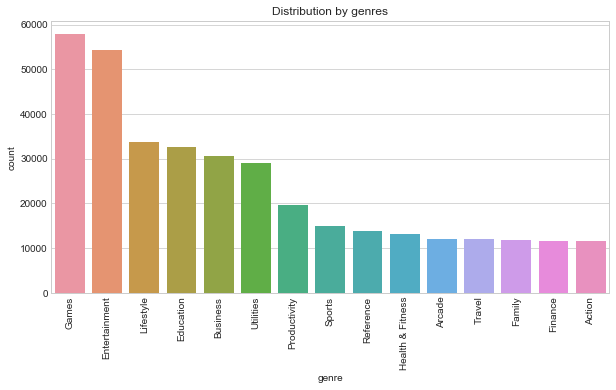

In [57]:
plt.figure(figsize=(10, 5))
fx = sns.barplot(x='genre', y='count', data=gs.head(15))
fx.set_xticklabels(rotation=90, labels=gs['genre'])
plt.title("Distribution by genres")

In [26]:
data['genres'] = df['genres']
data.head(10)

,bundleId,trackName,IsUniversal,fileSizeInMB,contentAdvisoryRating,currentVersionReleaseDate,version,subversion,artist,genres
0,com.aaa.iphone.discounts,AAA Mobile,True,153.721680,4+,2017-12-19T13:23:36Z,3,3.11,American Automobile Association,"[""Lifestyle"", ""Travel""]"
1,com.nextgenreality.gunclublite,AAA GUN CLUB lite,False,29.033732,9+,2009-11-07T02:12:31Z,1,1.7,Gun Club Studios,"[""Entertainment"", ""Games"", ""Simulation"", ""Acti..."
2,com.mcgames.chaosstrike2,Vanguard Online - AAA Shooting Free Online Gam...,True,174.367188,12+,2016-06-13T17:52:01Z,2,2.0,Hasim Mert Corekci,"[""Games"", ""Arcade"", ""Action""]"
3,com.BulletParty.BunboGames,AAA Bullet Party - Online first person shooter...,True,1182.394531,17+,2015-04-22T15:01:15Z,1,1.0,Engin Yildiz,"[""Games"", ""Arcade"", ""Action""]"
4,com.fmapp2010.ISearchFree,iSheacher,False,1.434688,17+,2011-11-23T01:52:45Z,1,1.3,feng min,"[""Photo & Video"", ""Utilities""]"
5,com.onteca.civilwarlite,AAA American Civil War Cannon Shooter : Defend...,True,107.042969,9+,2015-06-29T16:38:41Z,4,4.1,Onteca,"[""Games"", ""Entertainment"", ""Strategy"", ""Simula..."
6,com.appynation.powertoolsfree,Draw with Powertools FX Free,True,56.867188,4+,2016-01-12T23:42:31Z,2,2.7,Onteca,"[""Games"", ""Photo & Video"", ""Trivia"", ""Board""]"
7,com.1361447304.4691361447304,AAA+ Foundr - Entrepreneur Magazine for a Startup,True,32.477539,4+,2017-05-12T22:18:51Z,7,7.8,NHC PUBLISHING PTY. LTD,"[""Business"", ""Magazines & Newspapers""]"
8,com.1443792976.11461443792976,AAA+ Swimsuits & Sports Magazine App For Men,True,37.444336,17+,2017-02-14T21:57:51Z,7,7.8,azacreations,"[""Magazines & Newspapers"", ""Sports""]"
9,com.AnjaneyaApps.AAA1024Free,AAA 1024 Puzzle - cool math board game,True,13.113281,4+,2014-05-28T07:00:00Z,1,1.2,Bharat Bhushan,"[""Games"", ""Puzzle"", ""Entertainment"", ""Family""]"


### (15) Price
One of most important field

In [27]:
percentageFree = df[df.price == 0].shape[0] / df.shape[0] * 100

print ("%% Free: %0.3f %%" % percentageFree)

% Free: 89.683 %


In [28]:
data['price'] = df['price']

In [29]:
data.head(3)

,bundleId,trackName,IsUniversal,fileSizeInMB,contentAdvisoryRating,currentVersionReleaseDate,version,subversion,artist,genres,price
0,com.aaa.iphone.discounts,AAA Mobile,True,153.721680,4+,2017-12-19T13:23:36Z,3,3.11,American Automobile Association,"[""Lifestyle"", ""Travel""]",0.0
1,com.nextgenreality.gunclublite,AAA GUN CLUB lite,False,29.033732,9+,2009-11-07T02:12:31Z,1,1.7,Gun Club Studios,"[""Entertainment"", ""Games"", ""Simulation"", ""Acti...",0.0
2,com.mcgames.chaosstrike2,Vanguard Online - AAA Shooting Free Online Gam...,True,174.367188,12+,2016-06-13T17:52:01Z,2,2.0,Hasim Mert Corekci,"[""Games"", ""Arcade"", ""Action""]",0.0


### (16) Description
This is a plain text field, will just copy it to new dataframe and use as text features later

In [30]:
data['description'] = df.description

### (17) isVppDeviceBasedLicensingEnabled
I don't totally know what this feature means (TODO);
99.2% sample have true value rest have false, but stills storing this to actual df

In [31]:
df.isVppDeviceBasedLicensingEnabled.value_counts(normalize=True) * 100

True     99.25706
False     0.74294
Name: isVppDeviceBasedLicensingEnabled, dtype: float64

In [32]:
data['isVppDeviceBasedLicensingEnabled'] = df.isVppDeviceBasedLicensingEnabled

### (17) primaryGenreName
This is an interesting feature

In [33]:
df.primaryGenreName.value_counts(normalize=True) * 100

Games                     22.350510
Business                   9.406421
Education                  9.061377
Lifestyle                  6.478490
Entertainment              6.183290
Utilities                  5.812894
Finance                    3.986267
Health & Fitness           3.605129
Productivity               3.361063
Travel                     3.294460
Sports                     2.951135
Medical                    2.926213
Music                      2.853595
Photo & Video              2.684296
Reference                  2.488355
Social Networking          2.129132
News                       2.114522
Food & Drink               2.028583
Shopping                   1.992059
Book                       1.812877
Navigation                 1.365566
Stickers                   0.626493
Weather                    0.413795
Magazines & Newspapers     0.073478
Name: primaryGenreName, dtype: float64

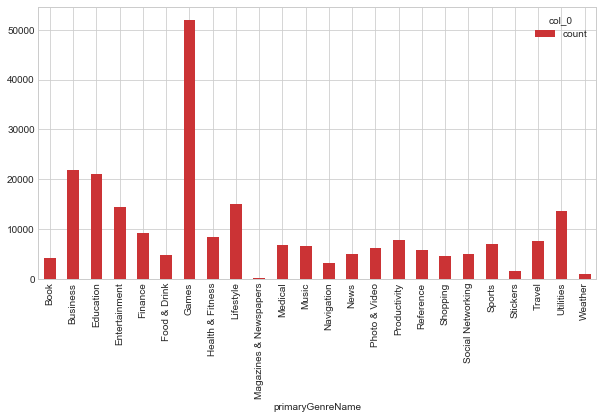

In [56]:
_ct = pd.crosstab(df.primaryGenreName, "count")
_ct.plot(kind='bar', figsize=(10, 5))

In [35]:
data['primaryGenreName'] = df.primaryGenreName

### (17) releaseDate
released date of app; This could be related to how old the app is

In [36]:
# data['releaseDate'] = df.releaseDate
from datetime import datetime
def getAgeInDays(datestring):
    return (datetime.now() - datetime.strptime(datestring, "%Y-%m-%dT%H:%M:%SZ")).days

data['releaseDate'] = df.releaseDate
data['ageInDays'] = df.releaseDate.apply(lambda x: getAgeInDays(x))

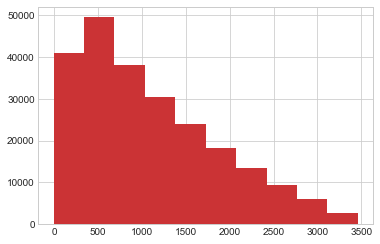

In [37]:
data['ageInDays'].hist()

### (18) minimumOsVersion
We will just keep the main version no for simplicity

In [38]:
def getMajorOSVersion(osver):
    return osver.split(".")[0]
data['minimumOsVersion'] = df.minimumOsVersion.apply(lambda x: getMajorOSVersion(x))

In [39]:
# % distribution
data['minimumOsVersion'].value_counts(normalize=True) * 100

8     31.535639
7     18.845929
6     17.336845
9     15.685103
5      5.416287
10     4.472680
4      4.352796
3      1.735103
11     0.413795
2      0.205823
Name: minimumOsVersion, dtype: float64

### (19) formattedPrice
Since we have price we will ignore this

### (20) primaryGenreId
Since we have string of primary Genre we will ignore this

### (21, 22) averageUserRating & avgUserRatingCV
This is another most important feature

In [40]:
# Actual
df.averageUserRating.value_counts(normalize=True) * 100

null    63.186435
4.5     12.223492
4.0      7.813547
3.5      4.999914
5.0      3.621457
3.0      3.548409
2.5      2.386088
2.0      1.383613
1.5      0.613173
1.0      0.223870
Name: averageUserRating, dtype: float64

In [41]:
# current version
df.avgUserRatingCV.value_counts(normalize=True) * 100

null    58.876180
5.0     10.017016
4.5      9.693886
4.0      6.389543
3.5      3.849195
3.0      3.605988
1.0      2.933518
2.5      2.002802
2.0      1.783658
1.5      0.848215
Name: avgUserRatingCV, dtype: float64

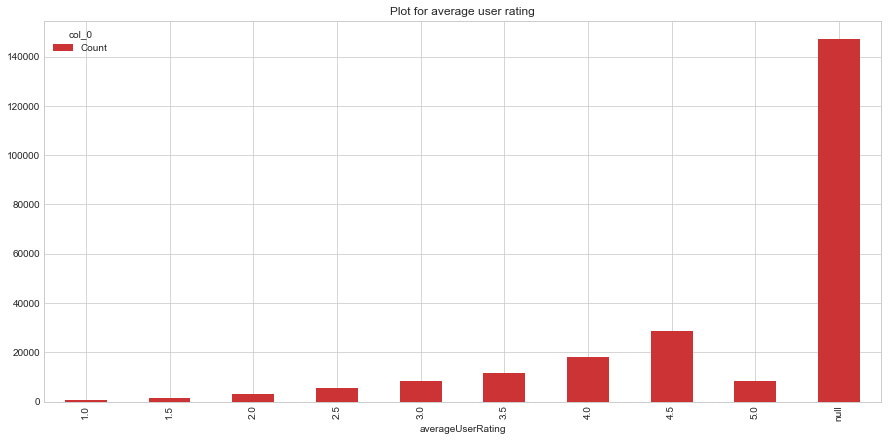

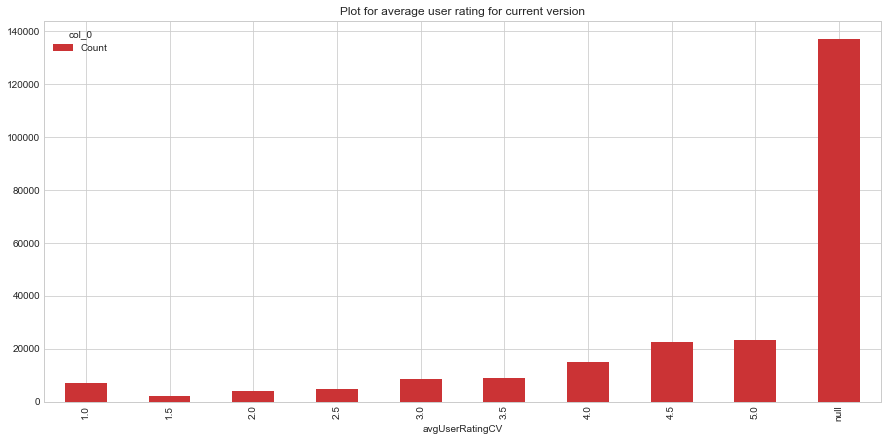

In [42]:
_ct = pd.crosstab(df.averageUserRating, "Count")
_ct.plot(kind='bar', figsize=(15, 7))
plt.title("Plot for average user rating")

_ct = pd.crosstab(df.avgUserRatingCV, "Count")
_ct.plot(kind='bar', figsize=(15, 7))
plt.title("Plot for average user rating for current version")

In [43]:
data['averageUserRating'] = df.averageUserRating
data['avgUserRatingCV'] = df.avgUserRatingCV

**Sumamry**: maximum apps have no user rating at all;
### (23, 24) userRatingCount & userRatingCountCV

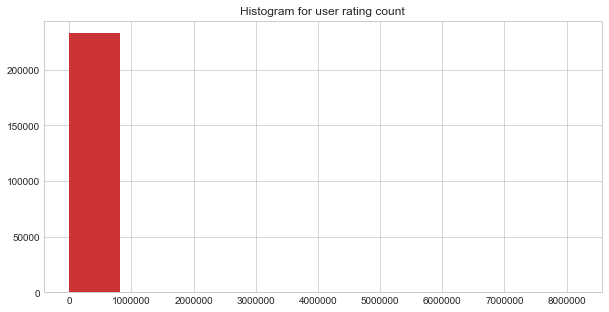

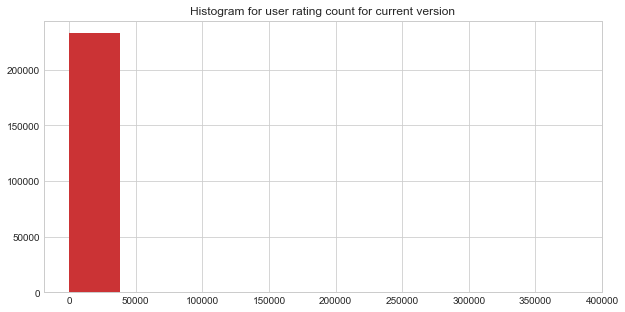

In [44]:
data['userRatingCount'] = df.userRatingCount.replace('null', 0)
data.userRatingCount = data.userRatingCount.apply(lambda x: int(x))
data.userRatingCount.hist(figsize=(10, 5))
plt.title("Histogram for user rating count")

plt.figure()
data['userRatingCountCV'] = df.userRatingCountCV.replace('null', 0)
data.userRatingCountCV = data.userRatingCountCV.apply(lambda x: int(x))
data.userRatingCountCV.hist(figsize=(10, 5))
plt.title("Histogram for user rating count for current version")

### (25) sellerUrl
 - Not all of the sellers have url, so one interesting property would be to check if website exist on the first place

In [45]:
data['hasUrl'] = df.sellerUrl.apply(lambda x: x != 'null')
data['hasUrl'].head(10)

0    False
1     True
2    False
3    False
4     True
5    False
6    False
7    False
8     True
9    False
Name: hasUrl, dtype: bool

In [46]:
def getDomain(url):
    if url == 'null':
        return 'null'
    
    _splt = url.split('/')
    if len(_splt) >= 3:
        return _splt[2]
    return 'null'

data['sellerUrl'] = df.sellerUrl
data['sellerUrlDomain'] = df.sellerUrl.apply(lambda x: getDomain(x))

In [47]:
data.head(10)

,bundleId,trackName,IsUniversal,fileSizeInMB,contentAdvisoryRating,currentVersionReleaseDate,version,subversion,artist,genres,...,releaseDate,ageInDays,minimumOsVersion,averageUserRating,avgUserRatingCV,userRatingCount,userRatingCountCV,hasUrl,sellerUrl,sellerUrlDomain
0,com.aaa.iphone.discounts,AAA Mobile,True,153.721680,4+,2017-12-19T13:23:36Z,3,3.11,American Automobile Association,"[""Lifestyle"", ""Travel""]",...,2009-04-21T04:39:36Z,3178,10,3.0,3.0,24767,34,False,null,null
1,com.nextgenreality.gunclublite,AAA GUN CLUB lite,False,29.033732,9+,2009-11-07T02:12:31Z,1,1.7,Gun Club Studios,"[""Entertainment"", ""Games"", ""Simulation"", ""Acti...",...,2009-04-28T07:00:00Z,3171,2,3.5,3.5,30957,20294,True,http://www.thebinarymill.com/gunclub3/,www.thebinarymill.com
2,com.mcgames.chaosstrike2,Vanguard Online - AAA Shooting Free Online Gam...,True,174.367188,12+,2016-06-13T17:52:01Z,2,2.0,Hasim Mert Corekci,"[""Games"", ""Arcade"", ""Action""]",...,2016-01-30T00:15:05Z,703,7,4.0,4.0,403,259,False,null,null
3,com.BulletParty.BunboGames,AAA Bullet Party - Online first person shooter...,True,1182.394531,17+,2015-04-22T15:01:15Z,1,1.0,Engin Yildiz,"[""Games"", ""Arcade"", ""Action""]",...,2014-11-06T01:21:25Z,1153,6,3.5,3.5,165,146,False,null,null
4,com.fmapp2010.ISearchFree,iSheacher,False,1.434688,17+,2011-11-23T01:52:45Z,1,1.3,feng min,"[""Photo & Video"", ""Utilities""]",...,2010-05-19T07:00:00Z,2785,3,2.5,2.0,322,71,True,http://clotapp.blog.com/2010/04/19/all-images-...,clotapp.blog.com
5,com.onteca.civilwarlite,AAA American Civil War Cannon Shooter : Defend...,True,107.042969,9+,2015-06-29T16:38:41Z,4,4.1,Onteca,"[""Games"", ""Entertainment"", ""Strategy"", ""Simula...",...,2012-11-16T20:26:43Z,1873,6,3.0,3.5,199,50,False,null,null
6,com.appynation.powertoolsfree,Draw with Powertools FX Free,True,56.867188,4+,2016-01-12T23:42:31Z,2,2.7,Onteca,"[""Games"", ""Photo & Video"", ""Trivia"", ""Board""]",...,2012-08-02T19:17:30Z,1979,7,4.0,2.5,64,4,False,null,null
7,com.1361447304.4691361447304,AAA+ Foundr - Entrepreneur Magazine for a Startup,True,32.477539,4+,2017-05-12T22:18:51Z,7,7.8,NHC PUBLISHING PTY. LTD,"[""Business"", ""Magazines & Newspapers""]",...,2013-03-05T00:19:42Z,1764,8,5.0,5.0,325,5,False,null,null
8,com.1443792976.11461443792976,AAA+ Swimsuits & Sports Magazine App For Men,True,37.444336,17+,2017-02-14T21:57:51Z,7,7.8,azacreations,"[""Magazines & Newspapers"", ""Sports""]",...,2015-10-13T20:10:31Z,812,8,4.0,3.5,86,17,True,http://www.swimsuitsandsports.com/,www.swimsuitsandsports.com
9,com.AnjaneyaApps.AAA1024Free,AAA 1024 Puzzle - cool math board game,True,13.113281,4+,2014-05-28T07:00:00Z,1,1.2,Bharat Bhushan,"[""Games"", ""Puzzle"", ""Entertainment"", ""Family""]",...,2014-05-28T07:00:00Z,1315,6,4.5,4.5,7,7,False,null,null


### (26) releaseNotes

In [48]:
data['releaseNotes'] = df.releaseNotes

## Write new data frame to disk

In [49]:
# data.to_csv("../dataset/processed.data.csv")

### Let's have a look at summary so far for paid apps

In [50]:
paidApps = df[df.price > 0]
paidApps.shape

(24010, 30)

**Summary**: around 15.5K paid apps have been mined; Let's look at their `contentAdvisoryRating` and `Genres`

In [59]:
def plotSummary(_df, figsize=(10, 5)):
    print (_df.contentAdvisoryRating.value_counts())
    print ()
    print ("Normalized distribution in %")
    print (_df.contentAdvisoryRating.value_counts(normalize =True) * 100)

    _ct = pd.crosstab(_df.contentAdvisoryRating, "count")
    _ct.plot(kind="pie", subplots=True)
    _ct.plot(kind="bar")
    plt.title("Distribution by content advisory rating")    
    
    # Genres
    _genres = {}
    for genreString in _df.genres.values:
        gs = json.loads(genreString)
        for g in gs:
            if g not in _genres:
                _genres[g] = 0
            _genres[g] = _genres[g] + 1
    
    _gdf = pd.DataFrame([[k,v] for k,v in _genres.items()], columns=['genre', 'count'])
    _gs = _gdf.sort_values(["count"], axis=0, ascending=False)
    
    plt.figure(figsize=figsize)
    fx = sns.barplot(x='genre', y='count', data=_gs.head(30))
    fx.set_xticklabels(rotation=90, labels=_gs['genre'])
    plt.title("Distribution by genres")
    
    _ct = pd.crosstab(_df.primaryGenreName, "count")
    print (_ct.columns)
    _ct = _ct.sort_values(["count"], axis=0, ascending=False)
#     sns.barplot(x='primaryGenreName', y='count', data=_ct)
    _ct.plot(kind='bar', figsize=figsize)
    plt.title("Distribution by primary genres")


4+     19289
12+     1960
17+     1704
9+      1057
Name: contentAdvisoryRating, dtype: int64

Normalized distribution in %
4+     80.337359
12+     8.163265
17+     7.097043
9+      4.402332
Name: contentAdvisoryRating, dtype: float64
Index(['count'], dtype='object', name='col_0')


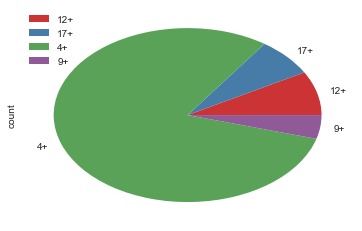

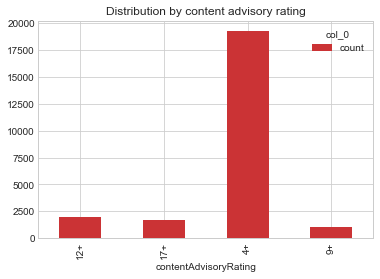

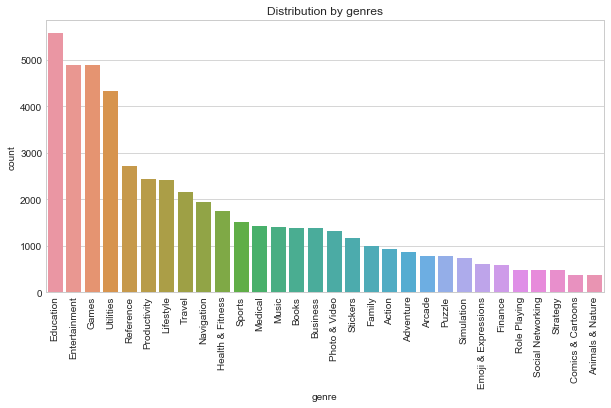

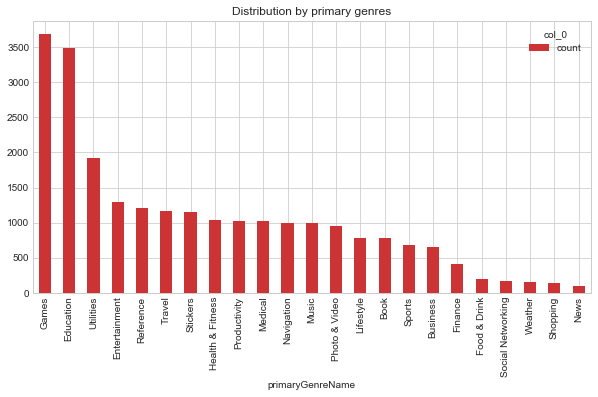

In [60]:
plotSummary(paidApps)

**Summary**:
 - Paid apps are more educational as compared to Games or Entertainment
 - Content Advisory Rating seem to be similar to free apps